In [2]:
import pandas as pd
DATA_DIR = '/Users/ash/Desktop/1221/drive-download-20211210T185953Z-001'

# Загрузка данных
### Чековые данные:

In [3]:
check_names = ['client_id', 'day', 'shop_id', 'check_id', 'time', 'sku', 'promo_id', 'check_pos', 'sold', 'supplier_price', 'selling_price', 'discount', 'region_name']
check_data = pd.read_csv(DATA_DIR+'/../pricing_hackathon_checks_train-003.csv', sep=',', header = None, names = check_names)

### Данные по ценам:

In [4]:
price_names = ['day', 'shop_id', 'sku', 'promo_id', 'reg_price', 'promo_price', 'card_price','region_name']
price_data = pd.read_csv(DATA_DIR+'/../pricing_hackathon_prices_train-002.csv', sep=',', header = None, names = price_names)

### Данные по иерархии товаров:

In [5]:
hierarchy_names = ['sku', 'class', 'group', 'category', 'subcategory']
hierarchy_data = pd.read_csv(DATA_DIR+'/pricing_hackathon_hierarchy.csv', sep=',', header = None, names = hierarchy_names)

### Данные по магазинам

In [6]:
shops_names = ['division_id', 'region_id', 'city_id', 'shop_id', 'type_loc_id', 'type_size_id', 'type_format_id', 'type_wealth_id', 'is_store', 'is_active', 'is_ex_billa']
shops_data = pd.read_csv(DATA_DIR+'/pricing_hackathon_shops.csv', sep=',', header = None, names = shops_names)

# Предобработка данных

### Слияние таблиц для унификации интерфейса

In [7]:
pre_merged_data = check_data.join(hierarchy_data.set_index('sku'), on='sku')
merged_data = pre_merged_data.join(shops_data.set_index('shop_id'), on='shop_id')

In [8]:
merged_data = merged_data.sort_values(by=['day'])
merged_data.head(10)

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,sold,supplier_price,...,division_id,region_id,city_id,type_loc_id,type_size_id,type_format_id,type_wealth_id,is_store,is_active,is_ex_billa
1162657,9bfd68781c20576e2d1de2e13382ab76,20180101,898dc2c947cee718e4afd7dfcb2f1a09,faf485edcc60f974a0b885be90ac45b2,12:17:49,3ed71429d00c3c4ed25c31e24a65b75e,86e14a9764ab2877fc56e9f20573fb14,2,1.000,40.05,...,e4da3b7fbbce2345d7772b0674a318d5,a5bfc9e07964f8dddeb95fc584cd965d,0768281a05da9f27df178b5c39a51263,1,7,1,1,1,1,0
1162756,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,0a0337d0ccc5f53486788823637dd82a,e768e8f3ce57ad35983ee76077828d8f,34,1.000,26.91,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162755,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,15688ce38dcc5e9a3a9c579f6cfca140,647c5c3c98b1e0b7296b5820e0884567,50,1.000,70.43,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162754,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,353880512236876dc4b8d7776680ae2b,da997b601e26b1cfca6f5e68c1da7610,15,1.000,203.79,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162753,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,850da7fe51f652f114c591e6a1cc6039,a4849b2d5b3f85096c8cf70a6f778953,36,1.000,48.42,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162752,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,666ef47c38e255981540a55e75ca9f3e,fafa2f6b2f4153f81dc1e2b380447aa4,29,1.000,60.01,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162751,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,1accaece89aad30aeab8ee5a72a2ecf0,fafa2f6b2f4153f81dc1e2b380447aa4,52,0.408,28.16,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162750,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,88236e8ee13c8378092d2c5411cc825d,393427f1e40db89710dcefd3e5bfc9a3,17,1.000,199.06,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162749,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,230c98c1c34d948212a84dc7cbd98f90,5f1d7a08b868499537d6f81a7ef2d66b,12,1.000,58.89,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162748,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,ef60aa64492347ae69e7c9309db3aea0,c1d69683ee8e4087e32e6536af9fe608,47,2.000,78.45,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0


In [21]:
merged_data.head(1000000)

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,sold,supplier_price,...,division_id,region_id,city_id,type_loc_id,type_size_id,type_format_id,type_wealth_id,is_store,is_active,is_ex_billa
1162657,9bfd68781c20576e2d1de2e13382ab76,20180101,898dc2c947cee718e4afd7dfcb2f1a09,faf485edcc60f974a0b885be90ac45b2,12:17:49,3ed71429d00c3c4ed25c31e24a65b75e,86e14a9764ab2877fc56e9f20573fb14,2,1.00,40.05,...,e4da3b7fbbce2345d7772b0674a318d5,a5bfc9e07964f8dddeb95fc584cd965d,0768281a05da9f27df178b5c39a51263,1,7,1,1,1,1,0
1162756,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,0a0337d0ccc5f53486788823637dd82a,e768e8f3ce57ad35983ee76077828d8f,34,1.00,26.91,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162755,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,15688ce38dcc5e9a3a9c579f6cfca140,647c5c3c98b1e0b7296b5820e0884567,50,1.00,70.43,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162754,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,353880512236876dc4b8d7776680ae2b,da997b601e26b1cfca6f5e68c1da7610,15,1.00,203.79,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
1162753,10cc0928d7ff2a4970524bd7475a7aeb,20180101,24a41dfc0b09c248bbc23b5e1ffc16d8,aec2d0cf6bd51324ed4fffe88c5613ae,13:17:47,850da7fe51f652f114c591e6a1cc6039,a4849b2d5b3f85096c8cf70a6f778953,36,1.00,48.42,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,4,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18455845,df9761755d44b62c2955c24d3eada0b0,20180330,4bc8f1a601aee89546deeb66b9625008,15531aebf7fcc06bda1a64b99bd21287,17:41:06,41a3c408a53b9829888f54674bfadc14,c24f82b4c76231a6b501d55cfcd50d3b,21,1.18,116.98,...,e4da3b7fbbce2345d7772b0674a318d5,6364d3f0f495b6ab9dcf8d3b5c6e0b01,2387337ba1e0b0249ba90f55b2ba2521,2,8,1,1,1,1,0
18455862,b7af726e3471bfd11bcd71b28443c4cf,20180330,4bc8f1a601aee89546deeb66b9625008,f32b872b72c58e1a55a00d36516b48c0,18:01:48,8d02566aaf75972f54ff4d74af67be95,0c8eaebeb9fcda6c94b4ce527eaeb42c,9,1.00,15.23,...,e4da3b7fbbce2345d7772b0674a318d5,6364d3f0f495b6ab9dcf8d3b5c6e0b01,2387337ba1e0b0249ba90f55b2ba2521,2,8,1,1,1,1,0
18455864,b7af726e3471bfd11bcd71b28443c4cf,20180330,4bc8f1a601aee89546deeb66b9625008,f32b872b72c58e1a55a00d36516b48c0,18:01:48,3af53731548236b3e5d4ec856125b1f1,88086ff1730a0d1473ab96fa46299031,7,1.00,128.97,...,e4da3b7fbbce2345d7772b0674a318d5,6364d3f0f495b6ab9dcf8d3b5c6e0b01,2387337ba1e0b0249ba90f55b2ba2521,2,8,1,1,1,1,0
18455879,8d378cc0ff85f223c4dd1d4defe3bef6,20180330,4bc8f1a601aee89546deeb66b9625008,282f392b89ee65cc8666234fff0cbff7,18:04:16,1bdd55c69458128f8eff38851b1bacba,501b8b2fe763f19e92bf32d718de545e,15,2.00,35.22,...,e4da3b7fbbce2345d7772b0674a318d5,6364d3f0f495b6ab9dcf8d3b5c6e0b01,2387337ba1e0b0249ba90f55b2ba2521,2,8,1,1,1,1,0


In [9]:
import matplotlib.pyplot as plt

### Разбиение данных по годам

In [10]:
year_2018 = merged_data[merged_data['day'] > 20209999]
# s = pd.Series(np.linspace(2018999, 2019999, 1000))
# year_2019 = merged_data.loc[(merged_data['day'].between(2018999, 2019999)]

# year_2020 = merged_data[merged_data['day'] < 20209999]

# year_2021 = merged_data[merged_data['day'] < 20219999]

#Разобраться как запихнуть сраный интервал в проверку
# year_2019 = pd.concat([merged_data[merged_data['day'] < 20199999], merged_data[merged_data['day'] > 20189999]], axis=1, join="outer").
#2020
#2021

In [11]:
year_2018.tail(1000)

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,sold,supplier_price,...,division_id,region_id,city_id,type_loc_id,type_size_id,type_format_id,type_wealth_id,is_store,is_active,is_ex_billa
10906068,e2f7b990dd5fc43c4eb99eca367bd7c2,20210630,028f7ee9eb0c0994a8ba1e60bcffd09e,23b79820e982b8d833d32e3a7039df94,04:24:42,ca05b7e0598f23e3eebe4c0f4790e4e0,7215ee9c7d9dc229d2921a40e899ec5f,6,1.000,30.05,...,e4da3b7fbbce2345d7772b0674a318d5,9a1158154dfa42caddbd0694a4e9bdc8,204904e461002b28511d5880e1c36a0f,1,4,1,2,1,1,0
10906070,236d476229e6a28174b9cc23ddf402eb,20210630,028f7ee9eb0c0994a8ba1e60bcffd09e,201a3f361a0d413e1f8f29bf1771890d,21:14:45,33f5bed4b5d6e0cf003813600f33b866,ae500ec394f059fbf48840d394a465c5,4,1.000,59.54,...,e4da3b7fbbce2345d7772b0674a318d5,9a1158154dfa42caddbd0694a4e9bdc8,204904e461002b28511d5880e1c36a0f,1,4,1,2,1,1,0
10906101,4e0f16f19220684cafa994ebab92bc40,20210630,c88a45cebe37ef31231604ff583105be,28062708ecb296a4a515de1dc6cf1b55,13:26:11,6819cec646e5d43ae88fb0ee96cf8fef,c84766177ce15e5144df509f3fcc67b5,11,1.000,151.82,...,e4da3b7fbbce2345d7772b0674a318d5,19ca14e7ea6328a42e0eb13d585e4c22,fed33392d3a48aa149a87a38b875ba4a,2,6,1,1,1,1,0
10906102,4e0f16f19220684cafa994ebab92bc40,20210630,c88a45cebe37ef31231604ff583105be,28062708ecb296a4a515de1dc6cf1b55,13:26:11,bee23c498c853634c6ed2b9168834855,935d1564ff1bdeca4ae88c8e2b8e079b,9,2.000,14.62,...,e4da3b7fbbce2345d7772b0674a318d5,19ca14e7ea6328a42e0eb13d585e4c22,fed33392d3a48aa149a87a38b875ba4a,2,6,1,1,1,1,0
10906103,4e0f16f19220684cafa994ebab92bc40,20210630,c88a45cebe37ef31231604ff583105be,28062708ecb296a4a515de1dc6cf1b55,13:26:11,7c658f878ff519d61799bd26e4647cc9,101b456583b0573c261104d1c0fcdb3f,5,2.000,32.94,...,e4da3b7fbbce2345d7772b0674a318d5,19ca14e7ea6328a42e0eb13d585e4c22,fed33392d3a48aa149a87a38b875ba4a,2,6,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907035,a2be70ccd683f385b5a9b1672007f292,20210630,5db5ae42bae950401219b2da9c583331,8b1115a1bee33445247c284053bcd124,10:28:00,3036102aef2834d9217b87445f3b118d,30f3e51f1e9cd874064c91ad39124a57,21,3.000,32.01,...,e4da3b7fbbce2345d7772b0674a318d5,fbd7939d674997cdb4692d34de8633c4,aa68c75c4a77c87f97fb686b2f068676,1,2,1,2,1,1,0
10907036,a2be70ccd683f385b5a9b1672007f292,20210630,5db5ae42bae950401219b2da9c583331,8b1115a1bee33445247c284053bcd124,10:28:00,9dbf56a73ef4178e472b30effccabb6e,e64a6d294d4dde9a31d753d2749f52eb,13,1.000,27.50,...,e4da3b7fbbce2345d7772b0674a318d5,fbd7939d674997cdb4692d34de8633c4,aa68c75c4a77c87f97fb686b2f068676,1,2,1,2,1,1,0
10907037,a2be70ccd683f385b5a9b1672007f292,20210630,5db5ae42bae950401219b2da9c583331,8b1115a1bee33445247c284053bcd124,10:28:00,e4567957326943b5e57cd58a7c072a66,7215ee9c7d9dc229d2921a40e899ec5f,10,1.000,67.57,...,e4da3b7fbbce2345d7772b0674a318d5,fbd7939d674997cdb4692d34de8633c4,aa68c75c4a77c87f97fb686b2f068676,1,2,1,2,1,1,0
10907025,821e3d526f4537a8f6f61ce60b637f89,20210630,5db5ae42bae950401219b2da9c583331,58e132f7b90557f1b5f5c38df424a750,18:16:41,753e100607ecf3e68098739b81e0a645,7d5b6b723cbe03bb6bc85b7d079a9ac3,7,2.228,412.75,...,e4da3b7fbbce2345d7772b0674a318d5,fbd7939d674997cdb4692d34de8633c4,aa68c75c4a77c87f97fb686b2f068676,1,2,1,2,1,1,0


### Отбор данных по одному товару и модификация графы "День" для показа месяца

In [12]:
plot_data_2018 = year_2018[year_2018['sku'] == '4bbd226a2c90c2f8c091b1686dd0510b']
plot_data_2018.head(10)

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,sold,supplier_price,...,division_id,region_id,city_id,type_loc_id,type_size_id,type_format_id,type_wealth_id,is_store,is_active,is_ex_billa
10191131,c2bac1baf762939871635d7f1be07619,20210101,a4bab3ce420ea5342f99b468206738eb,e03297728e29bbe6cf4639aeafe59dda,21:44:50,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,5,1.0,55.39,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,3,1,2,1,1,0
10244343,cf1a6f49b6cb2f1dd5133f934d267706,20210102,2b7f8457c72458d71a5b2b4380972519,05a33d4834ff422234350069c02b3f62,21:46:20,4bbd226a2c90c2f8c091b1686dd0510b,3ea9c3add62b06c541fd7d42b117a145,27,1.0,57.40,...,e4da3b7fbbce2345d7772b0674a318d5,182be0c5cdcd5072bb1864cdee4d3d6e,93d65641ff3f1586614cf2c1ad240b6c,1,7,1,1,1,1,0
10245170,bc78131da5e2fb920df902f91a087092,20210102,d04feef70623eaf7167f9172da8650db,67d857fb0b9d37d086db170514bc8095,08:51:10,4bbd226a2c90c2f8c091b1686dd0510b,912776e38cfafd089b2c8b78bcd30984,25,1.0,51.46,...,e4da3b7fbbce2345d7772b0674a318d5,c0c7c76d30bd3dcaefc96f40275bdc0a,3806734b256c27e41ec2c6bffa26d9e7,1,2,1,2,1,1,0
10244284,e857f55c0bb5fa0adc6f3e6203506a02,20210102,2b7f8457c72458d71a5b2b4380972519,37a22557fa57aeb0f08f84bec91e803d,15:45:11,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,12,1.0,57.40,...,e4da3b7fbbce2345d7772b0674a318d5,182be0c5cdcd5072bb1864cdee4d3d6e,93d65641ff3f1586614cf2c1ad240b6c,1,7,1,1,1,1,0
6552688,afe407d101bb069d97549eeba9c31842,20210102,be30a998b7393750806a3058d926469f,f32ccfd2ff8f8bb89f74a990f1100015,16:26:46,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,22,1.0,50.99,...,e4da3b7fbbce2345d7772b0674a318d5,e2c420d928d4bf8ce0ff2ec19b371514,9246444d94f081e3549803b928260f56,2,7,1,1,1,0,0
271663,d298591b7b759c3b9e118a902c324ab3,20210102,e90b327c1ceca11f1a44a8bcf58af34c,a57f59c755f760152e08d4972a3b329c,11:02:38,4bbd226a2c90c2f8c091b1686dd0510b,63a560e771ca813a9339eed0a7b0604e,16,1.0,59.63,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,1,3,1,2,1,1,0
271682,dc13bcec08be84544f759a02d4fa5f00,20210102,e90b327c1ceca11f1a44a8bcf58af34c,d322de9e223fdef2f8103f6c2c38611b,15:50:11,4bbd226a2c90c2f8c091b1686dd0510b,63a560e771ca813a9339eed0a7b0604e,4,1.0,59.63,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,1,3,1,2,1,1,0
4125437,8ad6f9d9113c2003a3a060b59dd51f72,20210103,fee67cadcc3a0bec8e00641884903c45,242fbc4f364fef62280f325839a606bb,17:38:16,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,2,1.0,52.50,...,e4da3b7fbbce2345d7772b0674a318d5,19ca14e7ea6328a42e0eb13d585e4c22,fed33392d3a48aa149a87a38b875ba4a,2,7,1,1,1,1,0
4126387,daa247ea4b0e8d737b8805015d4135ae,20210103,6a2095bc178dbb0ba00e8fd5f10306b2,97bcea815ba952c43f153e01fbb5e22f,15:39:27,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,18,1.0,59.87,...,e4da3b7fbbce2345d7772b0674a318d5,d645920e395fedad7bbbed0eca3fe2e0,ce5140df15d046a66883807d18d0264b,1,7,1,1,1,1,0
4126782,3ac3133878f7738739e3b5ef8d9b13eb,20210103,2b7f8457c72458d71a5b2b4380972519,d4eb9af1c691adaae4426df2bbc6b3d4,14:38:49,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,96,1.0,57.40,...,e4da3b7fbbce2345d7772b0674a318d5,182be0c5cdcd5072bb1864cdee4d3d6e,93d65641ff3f1586614cf2c1ad240b6c,1,7,1,1,1,1,0


In [13]:
plot_data_2018['day'] = plot_data_2018['day'].map(lambda x: str(x)[6:8])
plot_data_2018.head(10)

<ipython-input-13-7cd0eecafd11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_2018['day'] = plot_data_2018['day'].map(lambda x: str(x)[6:8])


,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,sold,supplier_price,...,division_id,region_id,city_id,type_loc_id,type_size_id,type_format_id,type_wealth_id,is_store,is_active,is_ex_billa
10191131,c2bac1baf762939871635d7f1be07619,01,a4bab3ce420ea5342f99b468206738eb,e03297728e29bbe6cf4639aeafe59dda,21:44:50,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,5,1.0,55.39,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,2,3,1,2,1,1,0
10244343,cf1a6f49b6cb2f1dd5133f934d267706,02,2b7f8457c72458d71a5b2b4380972519,05a33d4834ff422234350069c02b3f62,21:46:20,4bbd226a2c90c2f8c091b1686dd0510b,3ea9c3add62b06c541fd7d42b117a145,27,1.0,57.40,...,e4da3b7fbbce2345d7772b0674a318d5,182be0c5cdcd5072bb1864cdee4d3d6e,93d65641ff3f1586614cf2c1ad240b6c,1,7,1,1,1,1,0
10245170,bc78131da5e2fb920df902f91a087092,02,d04feef70623eaf7167f9172da8650db,67d857fb0b9d37d086db170514bc8095,08:51:10,4bbd226a2c90c2f8c091b1686dd0510b,912776e38cfafd089b2c8b78bcd30984,25,1.0,51.46,...,e4da3b7fbbce2345d7772b0674a318d5,c0c7c76d30bd3dcaefc96f40275bdc0a,3806734b256c27e41ec2c6bffa26d9e7,1,2,1,2,1,1,0
10244284,e857f55c0bb5fa0adc6f3e6203506a02,02,2b7f8457c72458d71a5b2b4380972519,37a22557fa57aeb0f08f84bec91e803d,15:45:11,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,12,1.0,57.40,...,e4da3b7fbbce2345d7772b0674a318d5,182be0c5cdcd5072bb1864cdee4d3d6e,93d65641ff3f1586614cf2c1ad240b6c,1,7,1,1,1,1,0
6552688,afe407d101bb069d97549eeba9c31842,02,be30a998b7393750806a3058d926469f,f32ccfd2ff8f8bb89f74a990f1100015,16:26:46,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,22,1.0,50.99,...,e4da3b7fbbce2345d7772b0674a318d5,e2c420d928d4bf8ce0ff2ec19b371514,9246444d94f081e3549803b928260f56,2,7,1,1,1,0,0
271663,d298591b7b759c3b9e118a902c324ab3,02,e90b327c1ceca11f1a44a8bcf58af34c,a57f59c755f760152e08d4972a3b329c,11:02:38,4bbd226a2c90c2f8c091b1686dd0510b,63a560e771ca813a9339eed0a7b0604e,16,1.0,59.63,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,1,3,1,2,1,1,0
271682,dc13bcec08be84544f759a02d4fa5f00,02,e90b327c1ceca11f1a44a8bcf58af34c,d322de9e223fdef2f8103f6c2c38611b,15:50:11,4bbd226a2c90c2f8c091b1686dd0510b,63a560e771ca813a9339eed0a7b0604e,4,1.0,59.63,...,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,1,3,1,2,1,1,0
4125437,8ad6f9d9113c2003a3a060b59dd51f72,03,fee67cadcc3a0bec8e00641884903c45,242fbc4f364fef62280f325839a606bb,17:38:16,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,2,1.0,52.50,...,e4da3b7fbbce2345d7772b0674a318d5,19ca14e7ea6328a42e0eb13d585e4c22,fed33392d3a48aa149a87a38b875ba4a,2,7,1,1,1,1,0
4126387,daa247ea4b0e8d737b8805015d4135ae,03,6a2095bc178dbb0ba00e8fd5f10306b2,97bcea815ba952c43f153e01fbb5e22f,15:39:27,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,18,1.0,59.87,...,e4da3b7fbbce2345d7772b0674a318d5,d645920e395fedad7bbbed0eca3fe2e0,ce5140df15d046a66883807d18d0264b,1,7,1,1,1,1,0
4126782,3ac3133878f7738739e3b5ef8d9b13eb,03,2b7f8457c72458d71a5b2b4380972519,d4eb9af1c691adaae4426df2bbc6b3d4,14:38:49,4bbd226a2c90c2f8c091b1686dd0510b,7215ee9c7d9dc229d2921a40e899ec5f,96,1.0,57.40,...,e4da3b7fbbce2345d7772b0674a318d5,182be0c5cdcd5072bb1864cdee4d3d6e,93d65641ff3f1586614cf2c1ad240b6c,1,7,1,1,1,1,0


In [14]:
plot_data_2018.columns

Index(['client_id', 'day', 'shop_id', 'check_id', 'time', 'sku', 'promo_id',
       'check_pos', 'sold', 'supplier_price', 'selling_price', 'discount',
       'region_name', 'class', 'group', 'category', 'subcategory',
       'division_id', 'region_id', 'city_id', 'type_loc_id', 'type_size_id',
       'type_format_id', 'type_wealth_id', 'is_store', 'is_active',
       'is_ex_billa'],
      dtype='object')

# Тестирование

### Загрузка тестировочных данных

In [15]:
test_header = ['client_id', 'day', 'shop_id', 'check_id', 'time', 'sku', 'promo_id', 'supplier_price', 'selling_price', 'discount', 'region_name', 'd_of_wk']
test_data = pd.read_csv(DATA_DIR+'/pricing_hackathon_checks_test.csv', sep=',', header = None, names = test_header)

### Отбор необходимых критериев для оптимизации цены

### Отбор данных по сезонам Л/О/З/В

In [42]:
td = test_data.head(10)
test_data.head(10)

,client_id,day,shop_id,check_id,time,sku,promo_id,supplier_price,selling_price,discount,region_name,d_of_wk
0,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,a7f8f533c4f62b8220b6493fef3f5191,9afa17bdb2b819a7d795533045c9c2db,64.84,86.26,28.72,7e35e74e610188414ad24235dd787c78,NaN
1,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,d8fc54c24b01b8eec0bd790d38fcb3a2,21:25:01,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78,NaN
2,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,d8fc54c24b01b8eec0bd790d38fcb3a2,21:25:01,ea88c10b723965c08ab2d54ef53786ac,19121bbfaa43e1f6d552bfe1212ee9a7,384.60,599.00,347.39,7e35e74e610188414ad24235dd787c78,NaN
3,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,1cbaaeb2212bbbe9d458ca9b81d74db7,07ed162d36d637a07cf5205962b6b73a,28.68,41.27,23.95,7e35e74e610188414ad24235dd787c78,NaN
4,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1.47,5.49,0.30,7e35e74e610188414ad24235dd787c78,NaN
5,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,4c17203530f5edf7c00d1b9dc5532680,95c52417a314fb5356b3e1607a784811,1659.65,1449.11,883.58,7e35e74e610188414ad24235dd787c78,NaN
6,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,9a127a03285bb90c527db5313cff4cfd,7215ee9c7d9dc229d2921a40e899ec5f,27.24,69.99,3.70,7e35e74e610188414ad24235dd787c78,NaN
7,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,1dc2d41a088e678b0676e07a927708c6,4eb5787a1eb55e5e5c3e40317b36f9ce,31.29,47.89,23.50,7e35e74e610188414ad24235dd787c78,NaN
8,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78,NaN
9,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,a41f4ca4683a93d40842bd128799d79f,a067e48aedb51140fefaee3f7d73ddfe,67.72,109.99,62.70,7e35e74e610188414ad24235dd787c78,NaN


In [16]:
for i in range(0, 1): # поправить срез к проду
    if str(test_data[1:2]['day'])[9:11] in ["12", "01", "02"]:
        winters_data = []
    if str(test_data[1:2]['day'])[9:11] in ["03", "04", "05"]:
        springs_data = []
    if str(test_data[1:2]['day'])[9:11] in ["06", "07", "08"]:
        summers_data = []
    if str(test_data[1:2]['day'])[9:11] in ["09", "10", "11"]:
        # Сужение до сезонов
        autumns_data_season = merged_data.copy()
        autumns_data_season_buff = merged_data.copy()
        autumns_data_season['day'] = autumns_data_season['day'].map(lambda x: str(x)[4:6])
        autumns_data_season_buff['day'] = autumns_data_season_buff['day'].map(lambda x: str(x)[6:8])
        autumns_data_season = autumns_data_season[autumns_data_season['day'].isin(["09", "10", "11"])]
        # Сужение до дней
#         autumns_data_day = autumns_data_season.copy()
#         autumns_data_day['day'] = autumns_data['day'].map(lambda x: str(x)[2:4])
#         autumns_data_day = autumns_data[autumns_data['day'].isin(["09", "10", "11"])]
    



In [17]:
autumns_data_season_buff.tail()

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,sold,supplier_price,...,division_id,region_id,city_id,type_loc_id,type_size_id,type_format_id,type_wealth_id,is_store,is_active,is_ex_billa
10907035,a2be70ccd683f385b5a9b1672007f292,30,5db5ae42bae950401219b2da9c583331,8b1115a1bee33445247c284053bcd124,10:28:00,3036102aef2834d9217b87445f3b118d,30f3e51f1e9cd874064c91ad39124a57,21,3.000,32.01,...,e4da3b7fbbce2345d7772b0674a318d5,fbd7939d674997cdb4692d34de8633c4,aa68c75c4a77c87f97fb686b2f068676,1,2,1,2,1,1,0
10907036,a2be70ccd683f385b5a9b1672007f292,30,5db5ae42bae950401219b2da9c583331,8b1115a1bee33445247c284053bcd124,10:28:00,9dbf56a73ef4178e472b30effccabb6e,e64a6d294d4dde9a31d753d2749f52eb,13,1.000,27.50,...,e4da3b7fbbce2345d7772b0674a318d5,fbd7939d674997cdb4692d34de8633c4,aa68c75c4a77c87f97fb686b2f068676,1,2,1,2,1,1,0
10907037,a2be70ccd683f385b5a9b1672007f292,30,5db5ae42bae950401219b2da9c583331,8b1115a1bee33445247c284053bcd124,10:28:00,e4567957326943b5e57cd58a7c072a66,7215ee9c7d9dc229d2921a40e899ec5f,10,1.000,67.57,...,e4da3b7fbbce2345d7772b0674a318d5,fbd7939d674997cdb4692d34de8633c4,aa68c75c4a77c87f97fb686b2f068676,1,2,1,2,1,1,0
10907025,821e3d526f4537a8f6f61ce60b637f89,30,5db5ae42bae950401219b2da9c583331,58e132f7b90557f1b5f5c38df424a750,18:16:41,753e100607ecf3e68098739b81e0a645,7d5b6b723cbe03bb6bc85b7d079a9ac3,7,2.228,412.75,...,e4da3b7fbbce2345d7772b0674a318d5,fbd7939d674997cdb4692d34de8633c4,aa68c75c4a77c87f97fb686b2f068676,1,2,1,2,1,1,0
8102279,5dfb754817d3ec1d6469f44f46ba4598,30,dad2fd502d209b12ac27f451b0b9c17e,8ae45ad93fcaa3228734d63b18d67356,15:33:18,d5e5cfe7bb4e7fac5b0f9e65ef12a235,7215ee9c7d9dc229d2921a40e899ec5f,5,1.000,47.39,...,e4da3b7fbbce2345d7772b0674a318d5,735b90b4568125ed6c3f678819b6e058,1e48c4420b7073bc11916c6c1de226bb,2,7,1,1,1,1,0


In [18]:
autumns_data_season = autumns_data_season.rename(columns={'day':'month'})

In [19]:
autumns_data_season_buff = autumns_data_season_buff.drop(['client_id', 'shop_id', 'time', 'sku', 'promo_id',
       'check_pos', 'sold', 'supplier_price', 'selling_price', 'discount',
       'region_name', 'class', 'group', 'category', 'subcategory',
       'division_id', 'region_id', 'city_id', 'type_loc_id', 'type_size_id',
       'type_format_id', 'type_wealth_id', 'is_store', 'is_active',
       'is_ex_billa'], axis=1)
# atm_fin_dat = autumns_data_season.join(autumns_data_season_buff.set_index('check_id'), on='check_id')

In [27]:
autumns_data_season_buff

,day,check_id
1162657,01,faf485edcc60f974a0b885be90ac45b2
1162756,01,aec2d0cf6bd51324ed4fffe88c5613ae
1162755,01,aec2d0cf6bd51324ed4fffe88c5613ae
1162754,01,aec2d0cf6bd51324ed4fffe88c5613ae
1162753,01,aec2d0cf6bd51324ed4fffe88c5613ae
...,...,...
10907035,30,8b1115a1bee33445247c284053bcd124
10907036,30,8b1115a1bee33445247c284053bcd124
10907037,30,8b1115a1bee33445247c284053bcd124
10907025,30,58e132f7b90557f1b5f5c38df424a750


In [28]:
aut_fin = autumns_data_season.join(autumns_data_season_buff.set_index('check_id'), on='check_id')

KeyboardInterrupt: 

In [39]:
plot_data_2018 = plot_data_2018.['day'].sum().reset_index()
plot_data_2018.head()

TypeError: string indices must be integers

Text(0.5, 1.0, 'Sold per wealth')

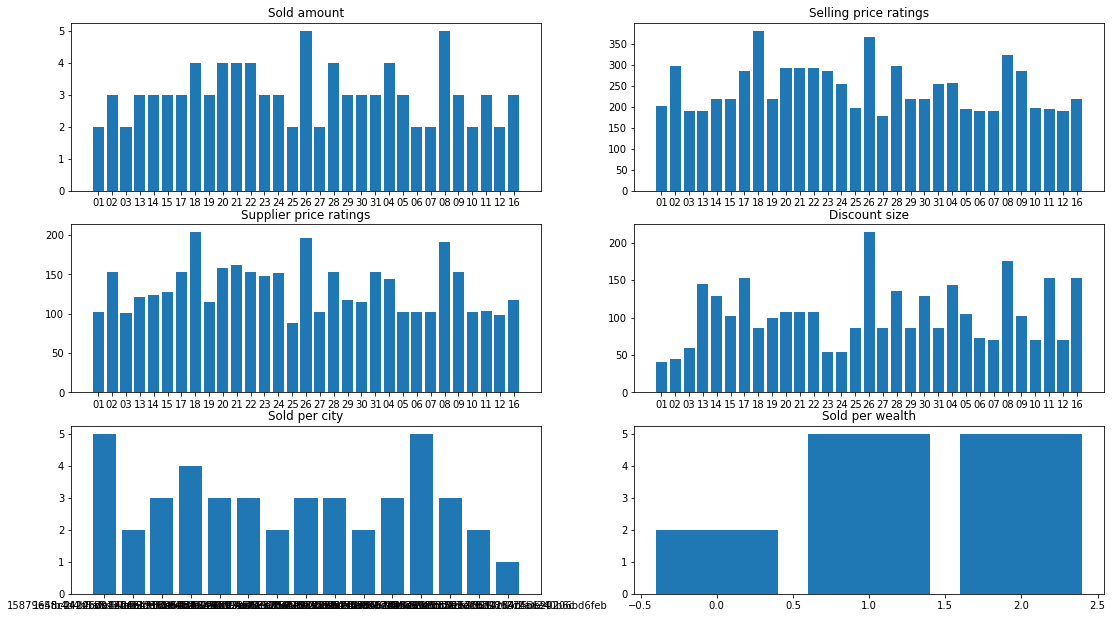

In [34]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(18.5, 10.5)

# Create bar plot
ax[0, 0].bar(plot_data_2018['day'], plot_data_2018['sold'])
ax[0, 0].set_title('Sold amount')

ax[0, 1].bar(plot_data_2018['day'], plot_data_2018['selling_price'])
ax[0, 1].set_title('Selling price ratings')

ax[1, 0].bar(plot_data_2018['day'], plot_data_2018['supplier_price'])
ax[1, 0].set_title('Supplier price ratings')

ax[1, 1].bar(plot_data_2018['day'], plot_data_2018['discount'])
ax[1, 1].set_title('Discount size')

ax[2, 0].bar(plot_data_2018['city_id'], plot_data_2018['sold'])
ax[2, 0].set_title('Sold per city')

ax[2, 1].bar(plot_data_2018['type_wealth_id'], plot_data_2018['sold'])
ax[2, 1].set_title('Sold per wealth')